<a href="https://colab.research.google.com/github/raviteja4812023/.Electric-Vehicle-EDA/blob/main/_Electric_Vehicleipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import bar_chart_race as bcr

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading the data
electric=pd.read_csv('/content/dataset.csv')
electric.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,NaN,198968248.0,POINT (-81.80023 24.5545),NaN,1.208797e+10
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,NaN,5204412.0,POINT (-114.57245 35.16815),NaN,3.200301e+10
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,0.0,15.0,218972519.0,POINT (-120.50721 46.60448),PACIFICORP,5.307700e+10
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,39.0,186750406.0,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,5.305795e+10
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,38.0,2006714.0,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10


In [ ]:
electric.shape

(53024, 17)

In [ ]:
electric.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53024 entries, 0 to 53023
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         53024 non-null  object 
 1   County                                             53024 non-null  object 
 2   City                                               53024 non-null  object 
 3   State                                              53024 non-null  object 
 4   Postal Code                                        53024 non-null  int64  
 5   Model Year                                         53024 non-null  int64  
 6   Make                                               53024 non-null  object 
 7   Model                                              53020 non-null  object 
 8   Electric Vehicle Type                              53024 non-null  object 
 9   Clean 

In [ ]:
# to summarise the data
electric.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,53024.000000,53024.000000,53023.000000,53023.000000,52896.000000,5.302300e+04,5.302300e+04
mean,98179.711923,2018.998171,88.607585,1759.323313,29.906401,1.990659e+08,5.296458e+10
std,2220.112058,2.886198,102.671952,10532.169214,14.649470,9.397621e+07,1.734210e+09
min,6443.000000,1997.000000,0.000000,0.000000,1.000000,1.028600e+04,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,19.000000,1.482776e+08,5.303301e+10
50%,98119.000000,2020.000000,33.000000,0.000000,34.000000,1.923553e+08,5.303303e+10
75%,98368.000000,2022.000000,208.000000,0.000000,43.000000,2.191611e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,184400.000000,49.000000,4.789355e+08,5.603300e+10


In [ ]:
# count the no of null values in each column
electric.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,4
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
# calculate the null values in percentage
electric.isnull().sum()*100/len(electric)

,0
VIN (1-10),0.000000
County,0.000000
City,0.000000
State,0.000000
Postal Code,0.000000
Model Year,0.000000
Make,0.000000
Model,0.007544
Electric Vehicle Type,0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0.000000


In [ ]:
# Drop rows with null values in 'Model' and 'Vehicle Location'
electric = electric.dropna(subset=['Model', 'Vehicle Location'])

In [ ]:
electric["Legislative District"].describe()

,Legislative District
count,52889.000000
mean,29.906635
std,14.649556
min,1.000000
25%,19.000000
50%,34.000000
75%,43.000000
max,49.000000


In [ ]:
# replace the Legislative District null vlaues with median
electric['Legislative District'].fillna(electric['Legislative District'].median(), inplace=True)

<ipython-input-11-35698f65a83d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  electric['Legislative District'].fillna(electric['Legislative District'].median(), inplace=True)
<ipython-input-11-35698f65a83d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electric['Legislative District'].fillna(electric['Legislative District'].median(), inp

In [ ]:
electric['Electric Utility'].value_counts()

,count
Electric Utility,
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),18738
PUGET SOUND ENERGY INC,10516
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),10338
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA),3039
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY,2420
...,...
CITY OF SUMAS - (WA)||PUD NO 1 OF WHATCOM COUNTY,1
BONNEVILLE POWER ADMINISTRATION||CITY OF COULEE DAM - (WA),1
BONNEVILLE POWER ADMINISTRATION||PENINSULA LIGHT COMPANY,1


In [ ]:
# replace with most frequent value in Electric Utility
electric['Electric Utility'].fillna(electric['Electric Utility'].mode()[0], inplace=True)

<ipython-input-13-8f8f1a87524a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  electric['Electric Utility'].fillna(electric['Electric Utility'].mode()[0], inplace=True)


In [ ]:
electric.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
# Convert 'Model Year' column to datetime format
electric['Model Year'] = pd.to_datetime(electric['Model Year'], errors = 'coerce')


In [ ]:
electric.dtypes

,0
VIN (1-10),object
County,object
City,object
State,object
Postal Code,int64
Model Year,datetime64[ns]
Make,object
Model,object
Electric Vehicle Type,object
Clean Alternative Fuel Vehicle (CAFV) Eligibility,object


In [ ]:
electric["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()

,count
Clean Alternative Fuel Vehicle (CAFV) Eligibility,
Clean Alternative Fuel Vehicle Eligible,27655
Eligibility unknown as battery range has not been researched,18411
Not eligible due to low battery range,6947


In [ ]:
num_df=electric.select_dtypes(include=['int64','float64'])
num_df.columns

Index(['Postal Code', 'Electric Range', 'Base MSRP', 'Legislative District',
       'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')

In [ ]:
cat_df=electric.select_dtypes(include=['object'])
cat_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')

In [ ]:
# distribution of electric Electric Vehicle Type
electric['Electric Vehicle Type'].value_counts()


,count
Electric Vehicle Type,
Battery Electric Vehicle (BEV),40661
Plug-in Hybrid Electric Vehicle (PHEV),12352


**Univariate Analysis**

<function matplotlib.pyplot.show(close=None, block=None)>

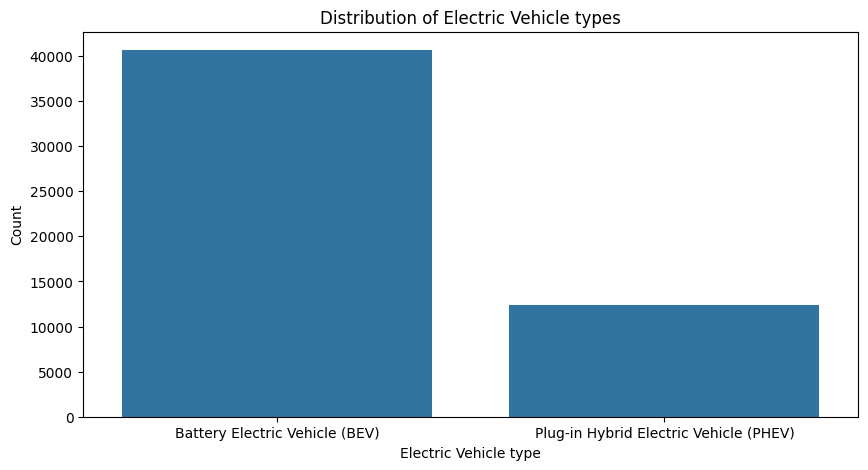

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=electric, x='Electric Vehicle Type', order=electric['Electric Vehicle Type'].value_counts().index)
plt.title('Distribution of Electric Vehicle types')
plt.xlabel('Electric Vehicle type')
plt.ylabel('Count')
plt.show

**The bar chart shows the distribution of electric vehicle types in the dataset. It's clear that Battery Electric Vehicles (BEV) are the way more common than Plug-in Hybrid Electric Vehicles (PHEV).**

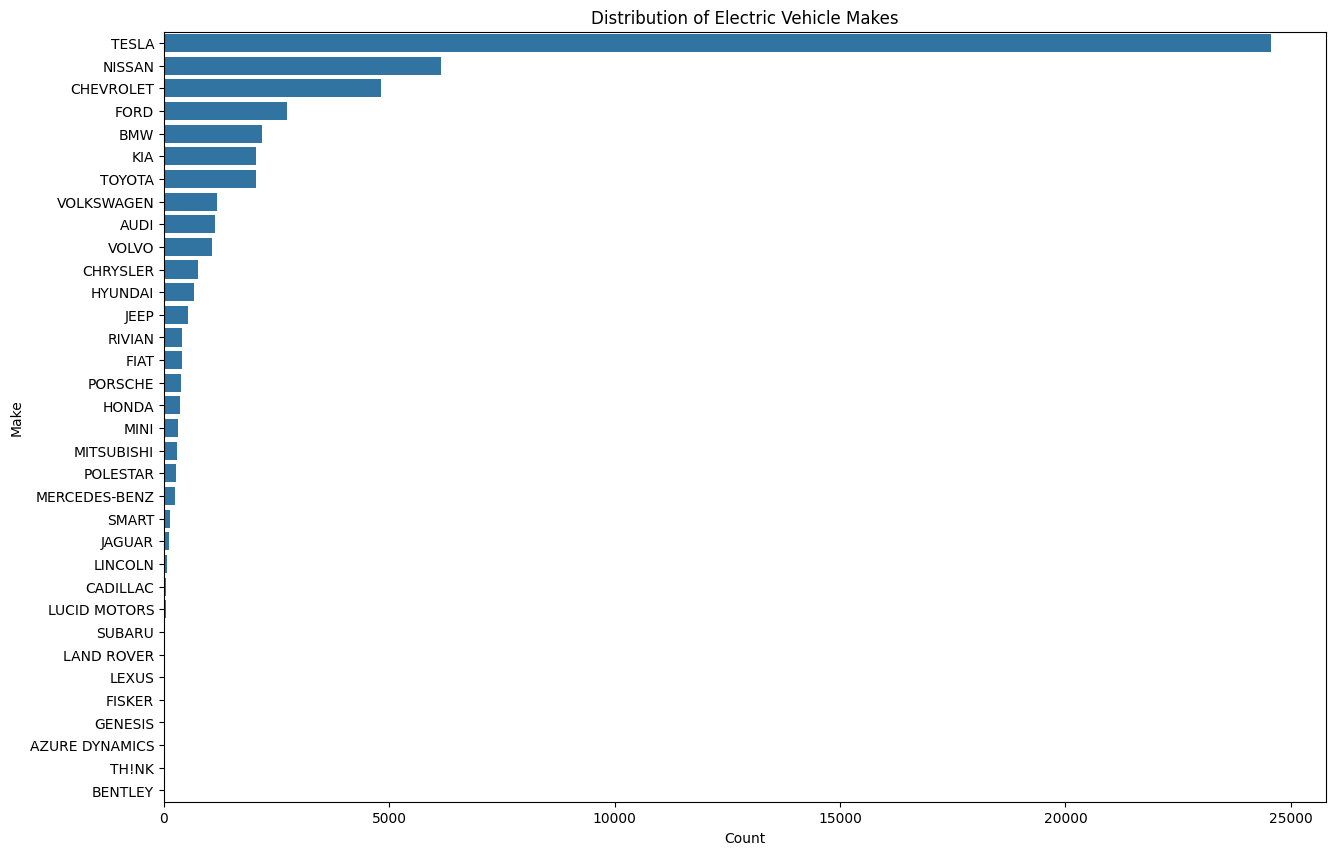

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(data=electric, y='Make', order = electric['Make'].value_counts().index)
plt.title('Distribution of Electric Vehicle Makes')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

**This count plot shows the distribution of electric vehicle makes. Tesla is the most common make, followed by Nissan, Chevrolet, and BMW.**

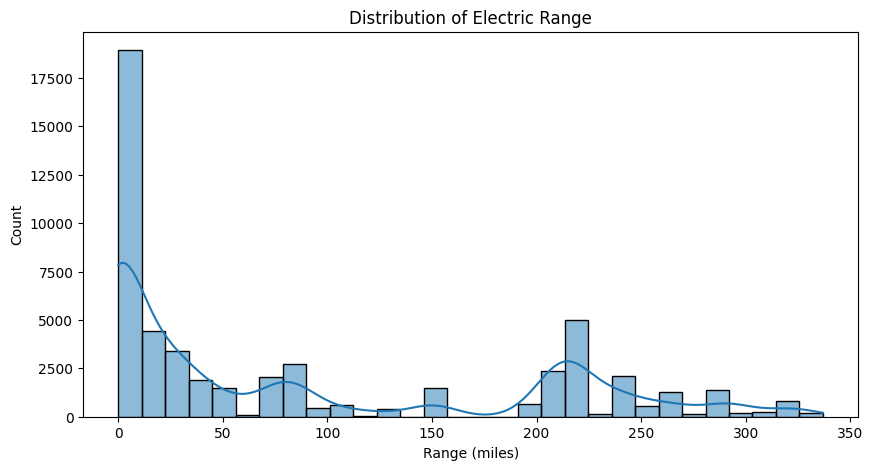

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(electric['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Range (miles)')
plt.ylabel('Count')
plt.show()

**The histogram shows the distribution of electric ranges for the vehicles in the dataset. Most vehicles have a range of less than 100 miles, but there are also some vehicles with a range of up to 300 miles or more.**

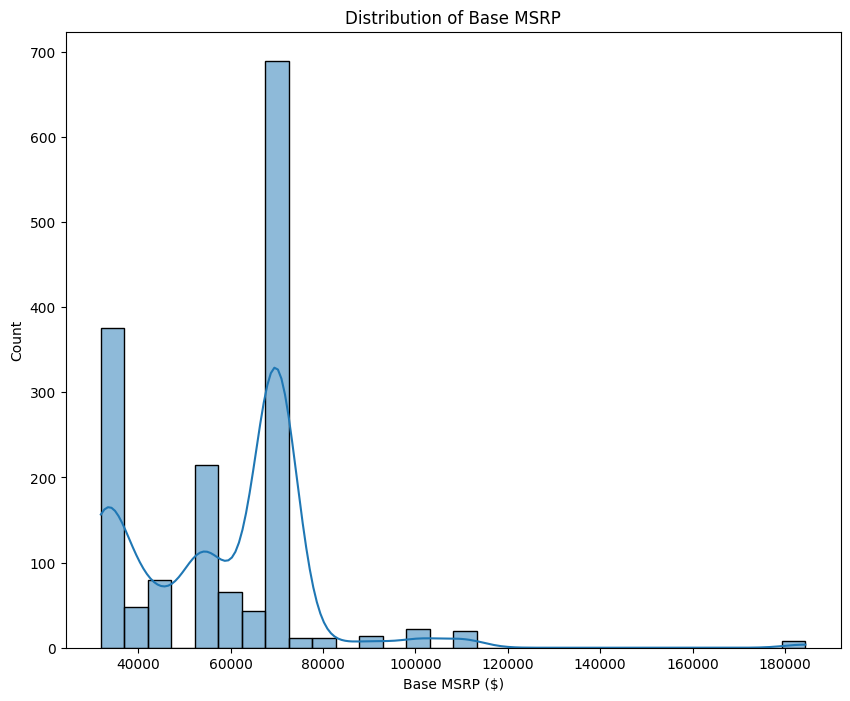

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(electric[electric['Base MSRP'] > 0]['Base MSRP'], bins=30, kde=True)
plt.title('Distribution of Base MSRP')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Count')
plt.show()

**This histogram shows the distribution of the Base Manufacturer's Suggested Retail Price (MSRP) for electric vehicles. We've filtered out entries with a 0 MSRP for this analysis. The majority of vehicles have a Base MSRP between 30,000 and 80,000.**

**Bivariate analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


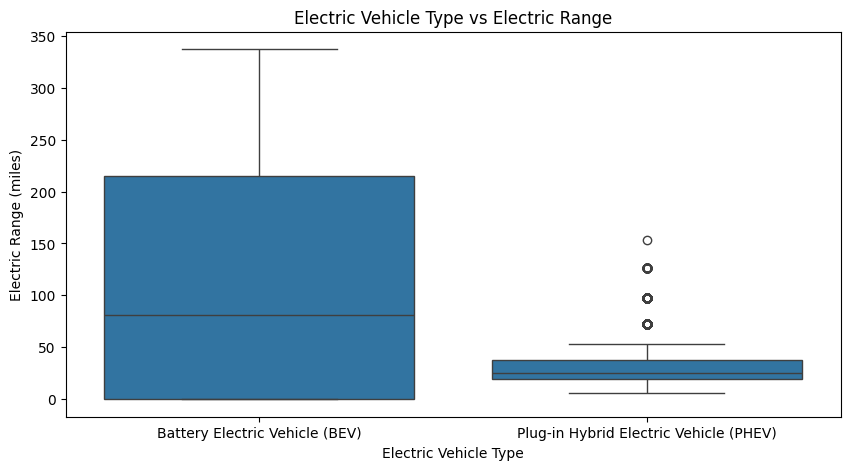

In [ ]:
# Electric Vehicle Type vs Electric Range
plt.figure(figsize=(10, 5))
sns.boxplot(data=electric, x='Electric Vehicle Type', y='Electric Range', order = electric['Electric Vehicle Type'].value_counts().index)
plt.title('Electric Vehicle Type vs Electric Range')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range (miles)')
plt.show()

In [ ]:
fig = px.scatter(electric, x="State", y="Model", color="Electric Vehicle Type")
fig.show()

In [ ]:
fig = px.scatter(electric, x="State", y="Model", color="Clean Alternative Fuel Vehicle (CAFV) Eligibility")
fig.show()

In [ ]:
fig = px.box(electric, x="Make", y="Electric Range", color="Electric Vehicle Type", notched=True)
fig.show()

**Task2 - Create a Choropleth to display the number of EV vehicles based on location.**

In [ ]:
import plotly.express as px
import pandas as pd

def EV_choropleth(df):
    # Calculating the count of EV vehicles for each state
    EV_State = electric['State'].value_counts().reset_index()
    EV_State.columns = ['State', 'EV Count']

    # Creating the Choropleth map using plotly.express
    fig = px.choropleth(
        EV_State,
        locations='State',
        color='EV Count',
        locationmode='USA-states',
        scope='usa',
        color_continuous_scale='YlOrRd',
        title="Choropleth Map of 'Count of EV Vehicles by State'"
    )

    # Updating the layout
    fig.update_layout(
        coloraxis_colorbar=dict(title='Count of EV vehicles'),
        geo_scope='usa'  # Limiting map scope to the USA
    )

    return fig

# Assuming 'electric' is your DataFrame
fig = EV_choropleth(electric)
fig.show()




*   Choropleth map provide an easy way to visualize how the 'Count of Electric vehicles' varies across a geographic area.
*   From the above map, it is clear that Washington(WA) state has highest number of Electric Vehicles usage.



**Task 3 - Create a Racing Bar Plot to display the animation of EV Make and its count each year **

In [ ]:
!pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.3 MB/s eta 0:00:00


In [ ]:
# Converting the 'Model Year' column to datetime type
electric['Model Year'] = pd.to_datetime(electric['Model Year'], format='%Y')

# Group by 'Model Year' and 'Make' to get the count of each make for each year
grouped_data = electric.groupby(['Model Year', 'Make']).size().reset_index(name='Count')



df_pivot_tab = grouped_data.pivot(index='Model Year', columns='Make', values='Count')

# Filling missing values using forward fill (pad)
df_pivot_tab = df_pivot_tab.fillna(method='pad')

# Creating the Racing Bar Plot
bcr.bar_chart_race(
    df=df_pivot_tab,
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    title='EV Make Racing Bar Plot by Year',
    label_bars=True,
    period_label={'x': 0.99, 'y': 0.25, 'ha': 'right', 'va': 'center'},
    period_fmt='%Y',
)


*  Racing Bar Plot is a form of data visualization that can be used to show
   changes in data over time.
*   Toyota, Nissan and Chevrolet are also competing fairly in the race of
    manufacturing EVs.



